In [ ]:
import pandas
import torch
import torch
from transformers import AutoModel, AutoTokenizer

In [3]:
data = pandas.read_csv("data.csv")

In [12]:
tokenizer = AutoTokenizer.from_pretrained("avsolatorio/NoInstruct-small-Embedding-v0")

In [10]:
tok = [tokenizer.encode(s) for s in data['short_description']]

39.11473087818697


(array([ 11.,  12.,  31.,  66.,  88., 109., 112.,  61.,  52.,  56.,  39.,
         20.,  18.,  11.,  12.,   2.,   3.,   0.,   2.,   1.]),
 array([  3. ,   8.3,  13.6,  18.9,  24.2,  29.5,  34.8,  40.1,  45.4,
         50.7,  56. ,  61.3,  66.6,  71.9,  77.2,  82.5,  87.8,  93.1,
         98.4, 103.7, 109. ]),
 <BarContainer object of 20 artists>)

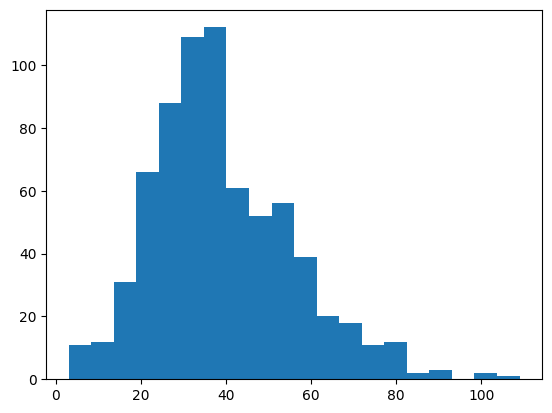

In [11]:
# token number
tok_len = [len(t) for t in tok]
# average number of tokens per description
print(sum(tok_len) / len(tok_len))
import matplotlib.pyplot as plt
plt.hist(tok_len, bins=20)

In [13]:
model = AutoModel.from_pretrained("avsolatorio/NoInstruct-small-Embedding-v0")
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 384, padding_idx=0)
    (position_embeddings): Embedding(512, 384)
    (token_type_embeddings): Embedding(2, 384)
    (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [17]:
with torch.no_grad():
    embed = [model(v).last_hidden_state[:, 0, :] for v in tok]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
# def get_embedding(text: Union[str, list[str]], mode: str = "sentence"):
#     model.eval()

#     assert mode in ("query", "sentence"), f"mode={mode} was passed but only `query` and `sentence` are the supported modes."

#     if isinstance(text, str):
#         text = [text]

#     inp = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

#     with torch.no_grad():
#         output = model(**inp)

#     # The model is optimized to use the mean pooling for queries,
#     # while the sentence / document embedding uses the [CLS] representation.

#     if mode == "query":
#         vectors = output.last_hidden_state * inp["attention_mask"].unsqueeze(2)
#         vectors = vectors.sum(dim=1) / inp["attention_mask"].sum(dim=-1).view(-1, 1)
#     else:
#         vectors = output.last_hidden_state[:, 0, :]

#     return vectors


In [ ]:
# texts = [
#     "Illustration of the REaLTabFormer model. The left block shows the non-relational tabular data model using GPT-2 with a causal LM head. In contrast, the right block shows how a relational dataset's child table is modeled using a sequence-to-sequence (Seq2Seq) model. The Seq2Seq model uses the observations in the parent table to condition the generation of the observations in the child table. The trained GPT-2 model on the parent table, with weights frozen, is also used as the encoder in the Seq2Seq model.",
#     "Predicting human mobility holds significant practical value, with applications ranging from enhancing disaster risk planning to simulating epidemic spread. In this paper, we present the GeoFormer, a decoder-only transformer model adapted from the GPT architecture to forecast human mobility.",
#     "As the economies of Southeast Asia continue adopting digital technologies, policy makers increasingly ask how to prepare the workforce for emerging labor demands. However, little is known about the skills that workers need to adapt to these changes"
# ]

# # Compute embeddings
# embeddings = get_embedding(texts, mode="sentence")

In [18]:
# embeddings

In [12]:
import pandas
data = pandas.read_csv("data.csv")
data['short_description'].to_list()

['Embark on a personalized wellness journey with Beyond Body – tailored 28-day meal plans, custom workout routines, mindfulness techniques, and habit-building strategies designed to boost health and confidence.',
 'Seeking creators to create UGC-style videos highlighting how our dating app stands out and showcasing its key features.',
 'Play around with Ism Lens for that cool twist, and breeze through edits with our easy copy-paste. It’s all about your vibe, your vision. Ready to remix your pics? ',
 "Promouvoir Officiel QI Test, un service de test de QI en ligne qui évalue l'intelligence de manière innovante et précise.",
 "Dans cette campagne on commence par un hook où vous mentionnez avoir été influencé par TikTok, avant de donner des précisions sur l'application Joko.",
 'Capture is the representation of your real life relationships. No influencers, no brands, no likes, no algorithms – just you and your friends sharing moments of your lives as you live them… with a surprise.',
 'To

In [13]:
embeddings = get_embedding(data['short_description'].to_list(), mode="sentence")

In [17]:
pandas.DataFrame(embeddings.tolist()).to_csv("embed.csv")